In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train=train.copy()
train.head()

rating                                         reviewText  \
0       3  Plot Storyline: 5 StarsThis novel accomplished...   
1       3  I did not like how EL ended this one. I don't ...   
2       5  I love how old fashioned this family is - they...   
3       5  I loved this story - It's about two friends wh...   
4       1  In the Dark Lands, a virus killed all possibil...   

                                   summary  
0                              3 1/4 Stars  
1  It was going great, then just.... ended  
2                             LOVED ALL 4!  
3             friends make the best lovers  
4          Blatantly sexist and homophobic

# TaskA

## Textual Data Representation

### BoW

In [5]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [6]:
train['text']=train['summary']+' '+train['reviewText'] #combine all the text features  
text=train['text']

In [7]:
train['rating'].unique() #The result of classification will start from zero rather than 1, therefore the ratings are re-coded here for convinence in the following steps.
train['response']=train['rating']-1

In [8]:
train.drop(['reviewText','summary','rating'],axis=1,inplace=True)

In [9]:
train.head()

text  response
0  3 1/4 Stars Plot Storyline: 5 StarsThis novel ...         2
1  It was going great, then just.... ended I did ...         2
2  LOVED ALL 4! I love how old fashioned this fam...         4
3  friends make the best lovers I loved this stor...         4
4  Blatantly sexist and homophobic In the Dark La...         0

In [10]:
bow_vectorizer = CountVectorizer(
                              ngram_range=(1, 2),      
                              token_pattern=r'\b\w+\b',  
                              min_df = 10, # ignore the words that appears less than 10 times in different documents
                              stop_words='english')
bow_txt = bow_vectorizer.fit_transform(text) 

In [11]:
bow_vectorizer.vocabulary_

{'3': 56,
 '1': 6,
 '4': 72,
 'stars': 6190,
 'plot': 4702,
 'storyline': 6421,
 '5': 81,
 'starsthis': 6199,
 'novel': 4393,
 'accomplished': 143,
 'set': 5851,
 'bring': 932,
 'reader': 5133,
 'action': 159,
 'won': 7435,
 't': 6592,
 'gems': 2574,
 'wisdom': 7404,
 'book': 680,
 'unless': 7139,
 'bit': 623,
 'twisted': 7079,
 'reading': 5138,
 'life': 3672,
 'changing': 1077,
 'experience': 2170,
 'age': 223,
 'old': 4449,
 'revenge': 5386,
 'death': 1583,
 'daddy': 1533,
 'story': 6285,
 'mr': 4259,
 'does': 1825,
 'little': 3784,
 'extra': 2196,
 'table': 6711,
 'end': 2001,
 'manages': 4053,
 'sequel': 5793,
 'believable': 557,
 'manner': 4057,
 'loved': 3927,
 'guy': 2829,
 'jumped': 3358,
 'covered': 1455,
 'chocolate': 1177,
 'body': 671,
 'wife': 7385,
 'mood': 4240,
 's': 5503,
 'lot': 3882,
 'humor': 3082,
 'make': 4012,
 'laugh': 3596,
 'character': 1082,
 'development': 1697,
 'just': 3363,
 'liked': 3741,
 'insight': 3202,
 'brett': 924,
 'starting': 6214,
 'hearing': 29

### Tf-idf

In [12]:
tfidf_vectorizer = TfidfVectorizer(norm='l2', ngram_range=(1,2),stop_words='english',smooth_idf=False,token_pattern=r'\b\w+\b',min_df=10)
tfidf_txt = tfidf_vectorizer.fit_transform(text)

In [13]:
tfidf_vectorizer.vocabulary_ # check if the preprocessing works 

{'3': 56,
 '1': 6,
 '4': 72,
 'stars': 6190,
 'plot': 4702,
 'storyline': 6421,
 '5': 81,
 'starsthis': 6199,
 'novel': 4393,
 'accomplished': 143,
 'set': 5851,
 'bring': 932,
 'reader': 5133,
 'action': 159,
 'won': 7435,
 't': 6592,
 'gems': 2574,
 'wisdom': 7404,
 'book': 680,
 'unless': 7139,
 'bit': 623,
 'twisted': 7079,
 'reading': 5138,
 'life': 3672,
 'changing': 1077,
 'experience': 2170,
 'age': 223,
 'old': 4449,
 'revenge': 5386,
 'death': 1583,
 'daddy': 1533,
 'story': 6285,
 'mr': 4259,
 'does': 1825,
 'little': 3784,
 'extra': 2196,
 'table': 6711,
 'end': 2001,
 'manages': 4053,
 'sequel': 5793,
 'believable': 557,
 'manner': 4057,
 'loved': 3927,
 'guy': 2829,
 'jumped': 3358,
 'covered': 1455,
 'chocolate': 1177,
 'body': 671,
 'wife': 7385,
 'mood': 4240,
 's': 5503,
 'lot': 3882,
 'humor': 3082,
 'make': 4012,
 'laugh': 3596,
 'character': 1082,
 'development': 1697,
 'just': 3363,
 'liked': 3741,
 'insight': 3202,
 'brett': 924,
 'starting': 6214,
 'hearing': 29

## Classification

### Train-Test Split 

In [14]:
#split the data into training (80%) and test (20%) sets for both methods.

index_train, index_test  = train_test_split(np.array(train.index), train_size=0.8, random_state=7)# split by row indices

bow_train = bow_txt[index_train].copy()
bow_test = bow_txt[index_test].copy()

tf_train =  tfidf_txt[index_train].copy()
tf_test =  tfidf_txt[index_test].copy()

y_train = train.loc[index_train,'response']
y_test = train.loc[index_test,'response']

In [15]:
RF = RandomForestClassifier(criterion = 'entropy')

tuning_parameters = {
    'n_estimators': [200,250,300,350],
    'max_features': [60,80,100],
    'min_samples_leaf':[1,10],
}

rf_search_b = RandomizedSearchCV(RF, tuning_parameters, cv = 5,  return_train_score=False,random_state=7)# use randomizedsearchcv to find the best combination of parameters in a more efficient way
rf_search_b.fit(bow_train, y_train )

rf_b = rf_search_b.best_estimator_

print('Best parameters found by randomised search:', rf_search_b.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 250, 'min_samples_leaf': 1, 'max_features': 60} 



In [16]:
# under the method of Tf-idf
RF = RandomForestClassifier(criterion = 'entropy')

tuning_parameters = {
    'n_estimators': [300,350,400,500],
    'max_features': [40,60,80,100],
    'min_samples_leaf':[1,10],
}

rf_search_t = RandomizedSearchCV(RF, tuning_parameters, cv = 5, return_train_score=False,random_state=7)
rf_search_t.fit(tf_train, y_train)

rf_t = rf_search_t.best_estimator_

print('Best parameters found by randomised search:', rf_search_t.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 350, 'min_samples_leaf': 1, 'max_features': 40} 



In [17]:
RF = RandomForestRegressor()

tuning_parameters = {
    'n_estimators': [200,250,300,350],
    'max_features': [60,80,100],
    'min_samples_leaf':[1,10],
}

rf_search_b_re = RandomizedSearchCV(RF, tuning_parameters, cv = 5,  return_train_score=False,random_state=7)
rf_search_b_re.fit(bow_train, y_train)

rf_b_re = rf_search_b_re.best_estimator_

print('Best parameters found by randomised search:', rf_search_b_re.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 100} 



In [18]:
RF= RandomForestRegressor()

tuning_parameters = {
    'n_estimators': [300,350,400,500],
    'max_features': [40,60,80,100],
    'min_samples_leaf':[1,10],
}
rf_search_t_re = RandomizedSearchCV(RF, tuning_parameters, cv = 5, return_train_score=False,random_state=7)
rf_search_t_re.fit(tf_train, y_train)

rf_t_re = rf_search_t_re.best_estimator_

print('Best parameters found by randomised search:', rf_search_t_re.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 100} 



## Model evaluation

In [19]:
from sklearn.metrics import f1_score 

y_pred_b=rf_b.predict(bow_test)
y_pred_t=rf_t.predict(tf_test)
y_pred_b_re=np.round(rf_b_re.predict(bow_test))
y_pred_t_re=np.round(rf_t_re.predict(tf_test))
pred=[y_pred_b,y_pred_t,y_pred_b_re,y_pred_t_re]

f1=[]
for pred in pred:
    score=f1_score(pred,y_test,average='macro')# a loop that outputs the F1 scores of the 4 models
    f1.append(score)
print(f1)

[0.4261197939225291, 0.4093959766475722, 0.27267448401910227, 0.2612798725452883]


In [20]:
np.random.seed (10)
column=['F1_score']
rows=['BoW classification','Tf-idf classification','BoW regression','Tf-idf regression']
result=pd.DataFrame(data=f1, columns=column, index=rows) 

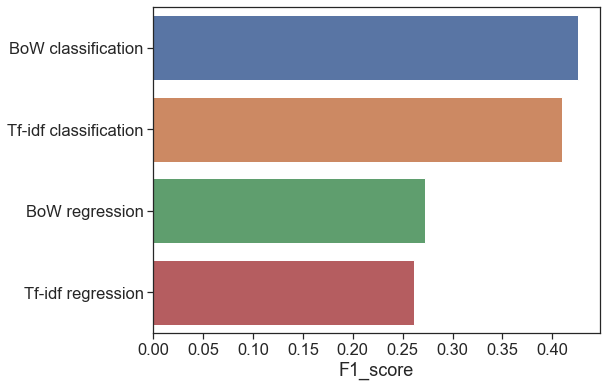

In [21]:
sns.set(context='notebook', style='ticks', font_scale=1.5)# change the fontsize in the chart to make it larger
plt.figure(figsize=(8,6))
chart = sns.barplot(data=result,x='F1_score',y=result.index)

In [22]:
# Save Models
import joblib

joblib.dump(rf_b,'rf_bow_classification.dat')
joblib.dump(rf_t,'rf_tdf_classification.dat')
joblib.dump(rf_b_re,'rf_bow_regression.dat')
joblib.dump(rf_t_re,'rf_tdf_regression.dat')


['rf_tdf_regression.dat']